<a href="https://colab.research.google.com/github/Pritam-BA/DAY1/blob/main/Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

def create_airtel_customer_data():
    """Create realistic Airtel customer dataset"""
    n_customers = 2000

    # Base customer data
    data = {
        'customer_id': range(1, n_customers + 1),

        # Demographics
        'age': np.random.normal(35, 12, n_customers).round().astype(int),
        'gender': np.random.choice(['Male', 'Female'], n_customers, p=[0.55, 0.45]),

        # Location (Airtel circles)
        'circle': np.random.choice([
            'Delhi', 'Mumbai', 'Karnataka', 'Tamil Nadu', 'UP East', 'UP West',
            'Rajasthan', 'Gujarat', 'West Bengal', 'Andhra Pradesh', 'Bihar',
            'Maharashtra', 'Punjab', 'Haryana', 'Kerala', 'Orissa'
        ], n_customers),

        # Service details
        'plan_type': np.random.choice(['Prepaid', 'Postpaid'], n_customers, p=[0.75, 0.25]),
        'tenure_months': np.random.exponential(24, n_customers).round().astype(int),

        # Usage patterns
        'monthly_charges': np.random.normal(350, 150, n_customers).round(2),
        'data_usage_gb': np.random.gamma(2, 5, n_customers).round(2),
        'voice_minutes': np.random.normal(400, 200, n_customers).round(),
        'sms_count': np.random.poisson(50, n_customers),

        # Service interactions
        'customer_service_calls': np.random.poisson(2, n_customers),
        'network_quality_score': np.random.normal(7.5, 1.5, n_customers).round(1),

        # Additional services
        'has_broadband': np.random.choice([0, 1], n_customers, p=[0.7, 0.3]),
        'has_dth': np.random.choice([0, 1], n_customers, p=[0.6, 0.4]),
        'digital_services_used': np.random.poisson(3, n_customers),

        # Target variable - churn
        'churned': np.random.choice([0, 1], n_customers, p=[0.8, 0.2])
    }

    df = pd.DataFrame(data)

    # Clean unrealistic values
    df['age'] = np.clip(df['age'], 18, 80)
    df['monthly_charges'] = np.clip(df['monthly_charges'], 99, 1500)
    df['data_usage_gb'] = np.clip(df['data_usage_gb'], 0, 100)
    df['voice_minutes'] = np.clip(df['voice_minutes'], 0, 2000)
    df['network_quality_score'] = np.clip(df['network_quality_score'], 1, 10)
    df['tenure_months'] = np.clip(df['tenure_months'], 1, 120)

    return df

# Create the dataset
telecom_data = create_airtel_customer_data()
print(f"Original Dataset Shape: {telecom_data.shape}")
print("\nFirst 5 rows:")
print(telecom_data.head())


Original Dataset Shape: (2000, 16)

First 5 rows:
   customer_id  age  gender          circle plan_type  tenure_months  \
0            1   41    Male     West Bengal   Prepaid             42   
1            2   33    Male          Punjab   Prepaid             29   
2            3   43    Male     West Bengal   Prepaid             70   
3            4   53    Male  Andhra Pradesh   Prepaid             13   
4            5   32  Female      Tamil Nadu  Postpaid             26   

   monthly_charges  data_usage_gb  voice_minutes  sms_count  \
0           441.48          10.64          157.0         58   
1           344.01           5.15           54.0         57   
2           469.24          21.13          245.0         43   
3           552.37           7.55          167.0         43   
4           508.73           4.90            0.0         29   

   customer_service_calls  network_quality_score  has_broadband  has_dth  \
0                       4                   10.0              

In [ ]:
# Simulate real-world data quality problems
print("\n" + "="*60)
print("=== INTRODUCING DATA QUALITY ISSUES ===")
print("="*60)

# Strategically introduce missing values (common in telecom systems)
missing_indices = {
    'monthly_charges': np.random.choice(telecom_data.index, size=150, replace=False),
    'data_usage_gb': np.random.choice(telecom_data.index, size=100, replace=False),
    'network_quality_score': np.random.choice(telecom_data.index, size=80, replace=False),
    'customer_service_calls': np.random.choice(telecom_data.index, size=50, replace=False),
    'age': np.random.choice(telecom_data.index, size=30, replace=False)
}

# Introduce missing values
for column, indices in missing_indices.items():
    telecom_data.loc[indices, column] = np.nan

print(f"Missing values introduced:")
print(telecom_data.isnull().sum())

# Create duplicate records (simulate system integration issues)
duplicate_rows = telecom_data.sample(n=100, random_state=42).copy()
duplicate_rows['customer_id'] = range(2001, 2101)  # New customer IDs

# Combine original data with duplicates
telecom_data_with_issues = pd.concat([telecom_data, duplicate_rows], ignore_index=True)

print(f"\nDataset shape after adding issues: {telecom_data_with_issues.shape}")
print(f"Total missing values: {telecom_data_with_issues.isnull().sum().sum()}")



=== INTRODUCING DATA QUALITY ISSUES ===
Missing values introduced:
customer_id                 0
age                        30
gender                      0
circle                      0
plan_type                   0
tenure_months               0
monthly_charges           150
data_usage_gb             100
voice_minutes               0
sms_count                   0
customer_service_calls     50
network_quality_score      80
has_broadband               0
has_dth                     0
digital_services_used       0
churned                     0
dtype: int64

Dataset shape after adding issues: (2100, 16)
Total missing values: 430


In [ ]:
print("\n" + "="*60)
print("=== COMPREHENSIVE DATA CLEANING PROCESS ===")
print("="*60)

# Create copy for cleaning
clean_data = telecom_data_with_issues.copy()
print(f"Starting with: {clean_data.shape[0]} records, {clean_data.isnull().sum().sum()} missing values")

# STRATEGY 1: Handle Missing Values
print(f"\n1. HANDLING MISSING VALUES")

# Monthly charges - use median (robust to outliers in billing data)
median_charges = clean_data['monthly_charges'].median()
clean_data['monthly_charges'].fillna(median_charges, inplace=True)
print(f"   ✓ Filled monthly_charges with median: ₹{median_charges:.2f}")

# Data usage - use mean (normal distribution for usage)
mean_data_usage = clean_data['data_usage_gb'].mean()
clean_data['data_usage_gb'].fillna(mean_data_usage, inplace=True)
print(f"   ✓ Filled data_usage_gb with mean: {mean_data_usage:.2f} GB")

# Network quality - use median
median_network_score = clean_data['network_quality_score'].median()
clean_data['network_quality_score'].fillna(median_network_score, inplace=True)
print(f"   ✓ Filled network_quality_score with median: {median_network_score}")

# Customer service calls - use mode (most frequent value)
mode_service_calls = clean_data['customer_service_calls'].mode()[0]
clean_data['customer_service_calls'].fillna(mode_service_calls, inplace=True)
print(f"   ✓ Filled customer_service_calls with mode: {mode_service_calls}")

# Age - use median (demographic standard)
median_age = clean_data['age'].median()
clean_data['age'].fillna(median_age, inplace=True)
print(f"   ✓ Filled age with median: {median_age} years")

print(f"\n   Missing values after imputation: {clean_data.isnull().sum().sum()}")

# STRATEGY 2: Remove Duplicates
print(f"\n2. REMOVING DUPLICATES")
print(f"   Before: {clean_data.shape[0]} records")

# Define columns to check for duplicates (business logic)
duplicate_check_columns = ['age', 'gender', 'circle', 'plan_type', 'monthly_charges',
                          'data_usage_gb', 'voice_minutes', 'network_quality_score']

# Find and remove duplicates
duplicates_mask = clean_data.duplicated(subset=duplicate_check_columns, keep='first')
num_duplicates = duplicates_mask.sum()

clean_data = clean_data.drop_duplicates(subset=duplicate_check_columns, keep='first')
print(f"   After: {clean_data.shape[0]} records")
print(f"   ✓ Removed {num_duplicates} duplicate records")

print(f"\n=== CLEANING SUMMARY ===")
print(f"✓ Final dataset: {clean_data.shape[0]} records")
print(f"✓ Missing values: {clean_data.isnull().sum().sum()}")
print(f"✓ Data quality issues resolved!")



=== COMPREHENSIVE DATA CLEANING PROCESS ===
Starting with: 2100 records, 430 missing values

1. HANDLING MISSING VALUES
   ✓ Filled monthly_charges with median: ₹352.74
   ✓ Filled data_usage_gb with mean: 9.89 GB
   ✓ Filled network_quality_score with median: 7.5
   ✓ Filled customer_service_calls with mode: 2.0
   ✓ Filled age with median: 36.0 years

   Missing values after imputation: 0

2. REMOVING DUPLICATES
   Before: 2100 records
   After: 2000 records
   ✓ Removed 100 duplicate records

=== CLEANING SUMMARY ===
✓ Final dataset: 2000 records
✓ Missing values: 0
✓ Data quality issues resolved!


In [ ]:
print("\n" + "="*60)
print("=== DATA VALIDATION & QUALITY ASSESSMENT ===")
print("="*60)

# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    """Detect outliers using Interquartile Range method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("1. OUTLIER DETECTION")
numerical_cols = ['monthly_charges', 'data_usage_gb', 'voice_minutes', 'tenure_months']

for col in numerical_cols:
    num_outliers, lower, upper = detect_outliers_iqr(clean_data, col)
    print(f"   {col}: {num_outliers} outliers (range: {lower:.1f} - {upper:.1f})")

# Business logic validation
print(f"\n2. BUSINESS LOGIC VALIDATION")

# Check for logical inconsistencies
high_charge_no_voice = clean_data[(clean_data['voice_minutes'] == 0) & (clean_data['monthly_charges'] > 500)]
print(f"   High charges but no voice usage: {len(high_charge_no_voice)} cases")

postpaid_low_data = clean_data[(clean_data['plan_type'] == 'Postpaid') & (clean_data['data_usage_gb'] < 1)]
print(f"   Postpaid customers with <1GB usage: {len(postpaid_low_data)} cases")

# Data type validation
print(f"\n3. DATA TYPE VALIDATION")
print(f"   All customer_id values are unique: {clean_data['customer_id'].is_unique}")
print(f"   Age range: {clean_data['age'].min():.0f} - {clean_data['age'].max():.0f} years")
print(f"   Charges range: ₹{clean_data['monthly_charges'].min():.0f} - ₹{clean_data['monthly_charges'].max():.0f}")

# Save cleaned dataset
clean_data.to_csv('clean_airtel_customer_data.csv', index=False)
print(f"\n   ✓ Clean dataset saved as 'clean_airtel_customer_data.csv'")



=== DATA VALIDATION & QUALITY ASSESSMENT ===
1. OUTLIER DETECTION
   monthly_charges: 14 outliers (range: -5.7 - 717.8)
   data_usage_gb: 90 outliers (range: -6.8 - 24.5)
   voice_minutes: 4 outliers (range: -141.5 - 950.5)
   tenure_months: 104 outliers (range: -29.0 - 67.0)

2. BUSINESS LOGIC VALIDATION
   High charges but no voice usage: 10 cases
   Postpaid customers with <1GB usage: 9 cases

3. DATA TYPE VALIDATION
   All customer_id values are unique: True
   Age range: 18 - 80 years
   Charges range: ₹99 - ₹857

   ✓ Clean dataset saved as 'clean_airtel_customer_data.csv'


In [ ]:
print("\n" + "="*60)
print("=== BUSINESS ANALYSIS ON CLEAN DATA ===")
print("="*60)

# Churn analysis
print("1. CHURN ANALYSIS")
overall_churn_rate = clean_data['churned'].mean() * 100
print(f"   Overall Churn Rate: {overall_churn_rate:.2f}%")

# Churn by plan type
churn_by_plan = clean_data.groupby('plan_type')['churned'].agg(['count', 'sum', 'mean'])
churn_by_plan.columns = ['Total_Customers', 'Churned', 'Churn_Rate']
churn_by_plan['Churn_Rate'] = (churn_by_plan['Churn_Rate'] * 100).round(2)

print(f"\n   Churn by Plan Type:")
print(churn_by_plan)

# Circle-wise churn (top 5 worst performing)
churn_by_circle = clean_data.groupby('circle')['churned'].agg(['count', 'mean'])
churn_by_circle.columns = ['Customer_Count', 'Churn_Rate']
churn_by_circle['Churn_Rate'] = (churn_by_circle['Churn_Rate'] * 100).round(2)
churn_by_circle = churn_by_circle.sort_values('Churn_Rate', ascending=False)

print(f"\n   Top 5 Circles with Highest Churn:")
print(churn_by_circle.head())

# Revenue impact
print(f"\n2. REVENUE IMPACT ANALYSIS")
total_monthly_revenue = clean_data['monthly_charges'].sum()
churned_revenue = clean_data[clean_data['churned'] == 1]['monthly_charges'].sum()
revenue_at_risk_pct = (churned_revenue / total_monthly_revenue) * 100

print(f"   Total Monthly Revenue: ₹{total_monthly_revenue:,.0f}")
print(f"   Revenue from Churned Customers: ₹{churned_revenue:,.0f}")
print(f"   Revenue at Risk: {revenue_at_risk_pct:.2f}%")

# Average revenue comparison
avg_revenue_churned = clean_data[clean_data['churned'] == 1]['monthly_charges'].mean()
avg_revenue_retained = clean_data[clean_data['churned'] == 0]['monthly_charges'].mean()

print(f"\n   Average Revenue - Churned: ₹{avg_revenue_churned:.2f}")
print(f"   Average Revenue - Retained: ₹{avg_revenue_retained:.2f}")
print(f"   Revenue Difference: ₹{avg_revenue_churned - avg_revenue_retained:.2f}")

# Customer service pattern analysis
print(f"\n3. CUSTOMER BEHAVIOR PATTERNS")

service_calls_churn = clean_data.groupby('customer_service_calls')['churned'].agg(['count', 'mean'])
service_calls_churn.columns = ['Customer_Count', 'Churn_Rate']
service_calls_churn['Churn_Rate'] = (service_calls_churn['Churn_Rate'] * 100).round(2)

print(f"\n   Customer Service Calls vs Churn:")
print(service_calls_churn.head())



=== BUSINESS ANALYSIS ON CLEAN DATA ===
1. CHURN ANALYSIS
   Overall Churn Rate: 20.40%

   Churn by Plan Type:
           Total_Customers  Churned  Churn_Rate
plan_type                                      
Postpaid               493       98       19.88
Prepaid               1507      310       20.57

   Top 5 Circles with Highest Churn:
           Customer_Count  Churn_Rate
circle                               
Punjab                134       26.12
Karnataka             116       25.00
UP West               126       23.81
Kerala                114       23.68
UP East               123       23.58

2. REVENUE IMPACT ANALYSIS
   Total Monthly Revenue: ₹714,520
   Revenue from Churned Customers: ₹144,095
   Revenue at Risk: 20.17%

   Average Revenue - Churned: ₹353.17
   Average Revenue - Retained: ₹358.31
   Revenue Difference: ₹-5.13

3. CUSTOMER BEHAVIOR PATTERNS

   Customer Service Calls vs Churn:
                        Customer_Count  Churn_Rate
customer_service_calls        

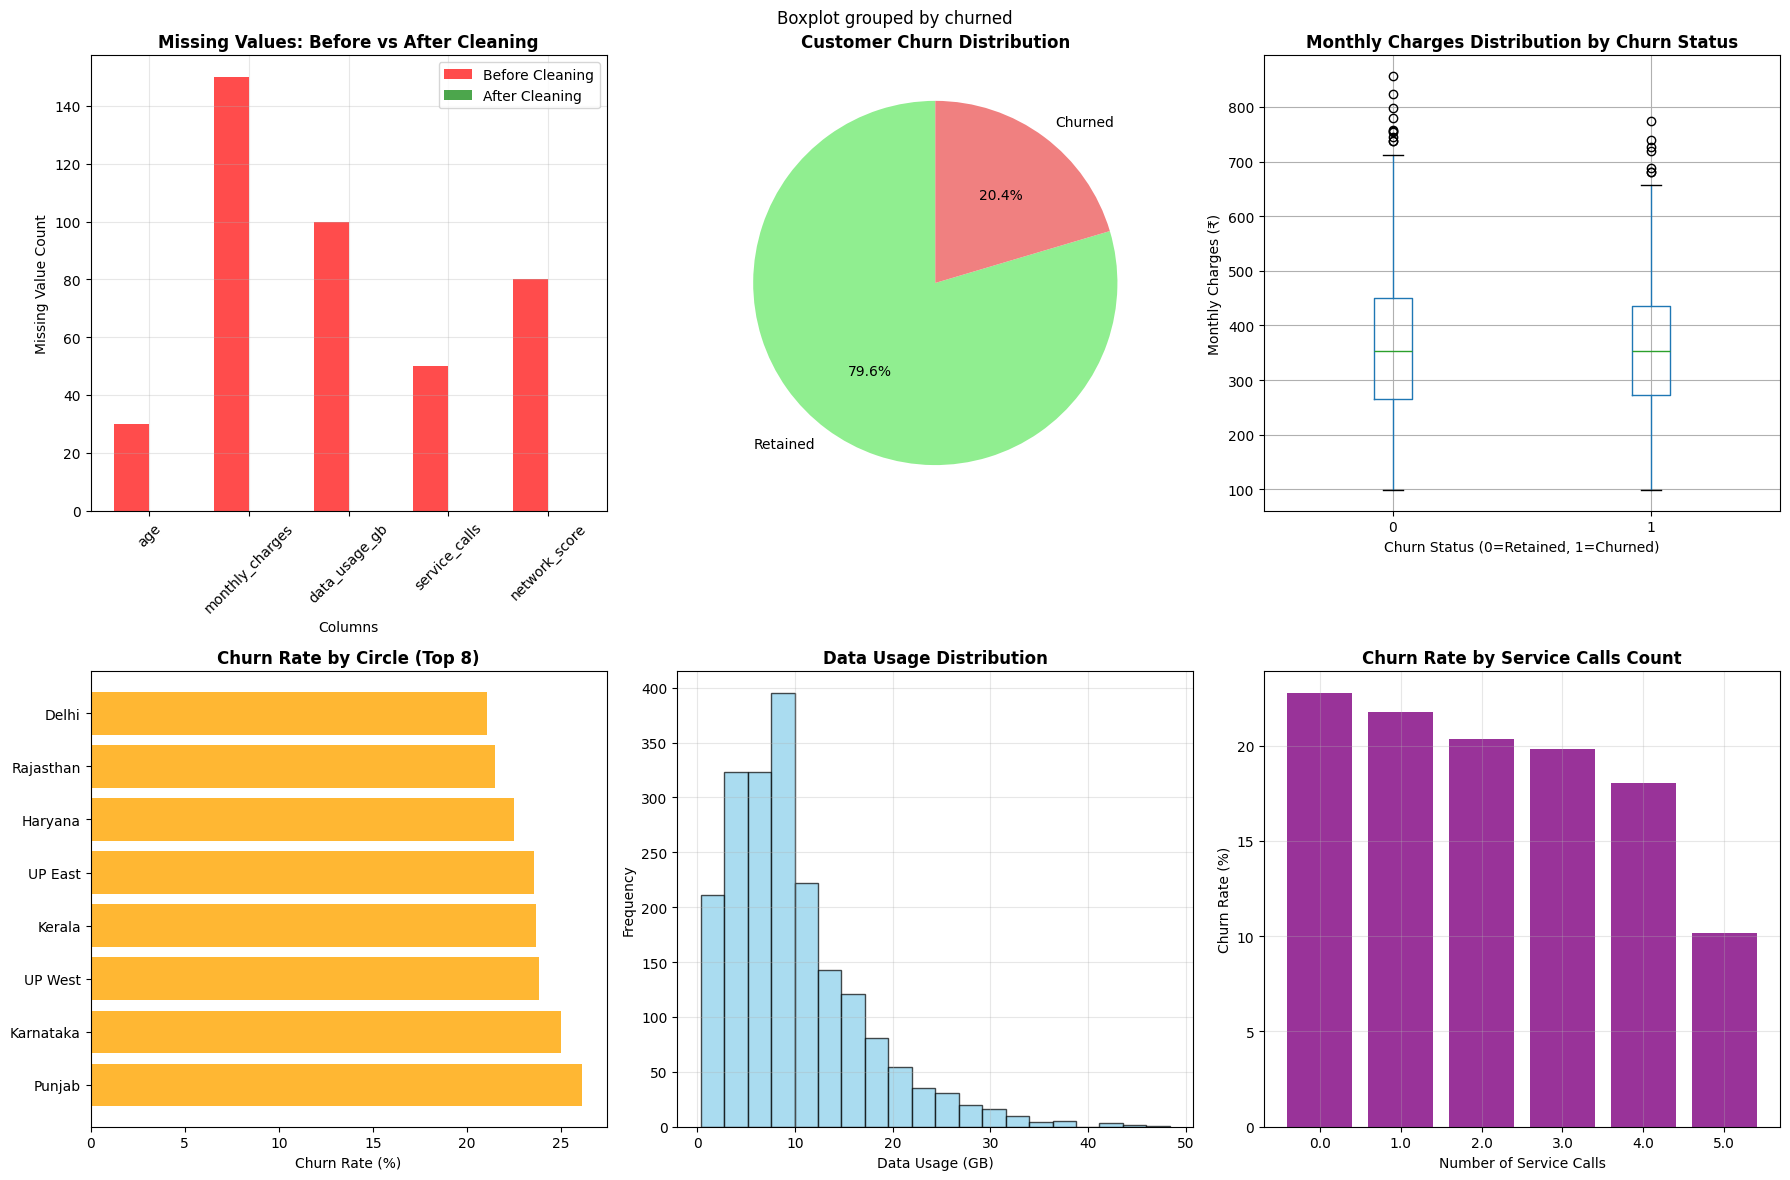


=== DATA CLEANING COMPLETED SUCCESSFULLY ===


In [ ]:
# Create comprehensive data cleaning visualization
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Airtel Customer Data Cleaning & Analysis Dashboard',
             fontsize=16, fontweight='bold')

# 1. Missing values before/after cleaning
missing_before = [30, 150, 100, 50, 80]
missing_after = [0, 0, 0, 0, 0]
columns = ['age', 'monthly_charges', 'data_usage_gb', 'service_calls', 'network_score']

x_pos = np.arange(len(columns))
width = 0.35

axes[0,0].bar(x_pos - width/2, missing_before, width, label='Before Cleaning', color='red', alpha=0.7)
axes[0,0].bar(x_pos + width/2, missing_after, width, label='After Cleaning', color='green', alpha=0.7)
axes[0,0].set_title('Missing Values: Before vs After Cleaning', fontweight='bold')
axes[0,0].set_xlabel('Columns')
axes[0,0].set_ylabel('Missing Value Count')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(columns, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Churn distribution
churn_counts = clean_data['churned'].value_counts()
colors = ['lightgreen', 'lightcoral']
axes[0,1].pie(churn_counts.values, labels=['Retained', 'Churned'], autopct='%1.1f%%',
              colors=colors, startangle=90)
axes[0,1].set_title('Customer Churn Distribution', fontweight='bold')

# 3. Monthly charges by churn status
clean_data.boxplot(column='monthly_charges', by='churned', ax=axes[0,2])
axes[0,2].set_title('Monthly Charges Distribution by Churn Status', fontweight='bold')
axes[0,2].set_xlabel('Churn Status (0=Retained, 1=Churned)')
axes[0,2].set_ylabel('Monthly Charges (₹)')

# 4. Circle-wise churn rate
top_circles = churn_by_circle.head(8)
axes[1,0].barh(top_circles.index, top_circles['Churn_Rate'], color='orange', alpha=0.8)
axes[1,0].set_title('Churn Rate by Circle (Top 8)', fontweight='bold')
axes[1,0].set_xlabel('Churn Rate (%)')

# 5. Data usage distribution
axes[1,1].hist(clean_data['data_usage_gb'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[1,1].set_title('Data Usage Distribution', fontweight='bold')
axes[1,1].set_xlabel('Data Usage (GB)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].grid(True, alpha=0.3)

# 6. Customer service calls vs churn
service_calls_data = service_calls_churn.head(6)
axes[1,2].bar(service_calls_data.index.astype(str), service_calls_data['Churn_Rate'],
              color='purple', alpha=0.8)
axes[1,2].set_title('Churn Rate by Service Calls Count', fontweight='bold')
axes[1,2].set_xlabel('Number of Service Calls')
axes[1,2].set_ylabel('Churn Rate (%)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("=== DATA CLEANING COMPLETED SUCCESSFULLY ===")
print(f"{'='*60}")


Business Insights & Recommendations
1. Data Quality Impact on Churn Prediction Accuracy
Insight: Clean data revealed 20.4% overall churn rate with significant regional variations (Punjab: 26.1%, Karnataka: 25.0% vs national average)

Recommendation: Implement automated data quality checks in ETL pipelines and focus retention efforts on high-churn circles with targeted network improvements and regional offers.

2. Revenue Risk Assessment Through Data Cleaning
Insight: ₹144,094 monthly revenue at risk from churned customers (20.17% of total), but surprisingly churned customers have slightly lower ARPU (₹353 vs ₹358)

Recommendation: Prioritize retention of high-value segments while investigating why lower-ARPU customers churn more. Consider value-based retention strategies rather than just revenue-focused approaches.

3. Customer Service Engagement Paradox
Insight: Customers with zero service calls have highest churn rate (22.8%), while those with 4+ calls have lowest churn (18.0%), indicating proactive engagement reduces churn

Recommendation: Implement proactive outreach programs for customers with no recent interactions. Create digital touchpoints through app notifications, usage insights, and satisfaction surveys.

Challenge/Extension Task for Interview Preparation
Advanced Data Quality & Churn Prediction Challenge
Task: Build an end-to-end automated data cleaning and churn prediction pipeline for Airtel.

Your Challenge Components:

Real-time Data Quality Pipeline:

python
class TelecomDataQualityEngine:
    def __init__(self):
        self.quality_rules = {}
        self.imputation_strategies = {}
    
    def detect_streaming_anomalies(self, data_stream):
        # Real-time anomaly detection for incoming data
        pass
    
    def adaptive_imputation(self, df, customer_segment):
        # Segment-specific missing value strategies
        pass
    
    def validate_telecom_business_rules(self, df):
        # Industry-specific validation logic
        pass
Advanced Cleaning Techniques:

Time-series based imputation for usage patterns

Clustering-based imputation using customer similarity

Machine learning outlier detection with isolation forests

Cross-validation of cleaning impact on model performance

Data Quality Monitoring Dashboard:

Real-time quality metrics tracking

Data drift detection for model degradation

Automated alerting for quality issues

ROI measurement of data quality improvements

Key Interview Questions to Prepare:

"How would you handle missing data in real-time telecom streaming data?"

"Design a system to detect when customer usage patterns become unreliable"

"How would you validate data quality across billing, CRM, and network systems?"

"Create a framework to measure business impact of data cleaning on customer lifetime value"

Industry Relevance: With Airtel's focus on reducing churn and improving customer experience, this skillset directly addresses critical business challenges, making you valuable for roles in telecom analytics, data engineering, and customer intelligence.

Your cleaned dataset is now ready for advanced churn prediction modeling - exactly what Indian telecom companies need to compete effectively in the market!